# About Dataset

The dataset I'm using for this project is publically availible on [kaggle](https://www.kaggle.com/) uploaded by VICTOR SOEIRO with name 'Netflix TV Shows and Movies' under [license](https://creativecommons.org/publicdomain/zero/1.0/). The datset is about Movies and TV Shows listings on Netflix (May, 2022). The dataset isn't primary or secondry so it might contain many errors. This analysis would have been more interesting and helpful to Netfilx if there was another column which contained number of views of each movie/show. In my opionion this data is incomplete.

I want see which country release most of movies or which genres was listed on Netflix(may, 2022) the most. Which country prefer movies or shows. let's see which kind of tiltes movies have been used the most and what kind of stories were listed on netflix(may, 2022). I also wanted to see which kind of age certification is required to watch these movies, so that parents decides weather it's a good or bad idea to buy netflix account for their kids. I wanted to find interesting relationships between 'imdb_score', 'imdb_votes' with each other and with  'tmdb_score', 'tmdb_popularity' but unfortunately there are alot of missings values. so I removed 'imdb_score', 'imdb_votes' columns. 


#### Import necessart libraries

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline 
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
warnings.filterwarnings('ignore')

#### Import data

In [24]:
file_location = 'C:/Users/Ibad/Desktop/netflix_project'

titles = pd.read_csv(file_location +'/titles.csv')
#credits = pd.read_csv(file_location + '/credits.csv')
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


#### Cleaning Data

In [25]:
titles.isna().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

In [26]:

drop_col = [ 'seasons', 'imdb_id','age_certification', 'imdb_score', 'imdb_votes', 'runtime']

df  = titles.drop(drop_col, axis = 1 )
df.dropna(inplace  = True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5479 entries, 1 to 5805
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5479 non-null   object 
 1   title                 5479 non-null   object 
 2   type                  5479 non-null   object 
 3   description           5479 non-null   object 
 4   release_year          5479 non-null   int64  
 5   genres                5479 non-null   object 
 6   production_countries  5479 non-null   object 
 7   tmdb_popularity       5479 non-null   float64
 8   tmdb_score            5479 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 428.0+ KB


#### Analyzing through genres

In [27]:
df['genres'].value_counts().reset_index().head(10)

,index,genres
0,['comedy'],485
1,['drama'],300
2,['documentation'],291
3,"['comedy', 'drama']",135
4,"['drama', 'comedy']",119
5,"['drama', 'romance']",110
6,['reality'],107
7,"['comedy', 'documentation']",93
8,"['comedy', 'romance']",58
9,"['comedy', 'drama', 'romance']",58


In [28]:
df_comedy = df[df['genres'].str.contains("'comedy'")]
df_comedy.loc[:, 'genres'] = 'comedy'

df_drama = df[df['genres'].str.contains("'drama'")]
df_drama.loc[:, 'genres'] = 'drama'

df_doc = df[df['genres'].str.contains("'documentation'")]
df_doc.loc[:, 'genres'] = 'documentation'

df_real = df[df['genres'].str.contains('reality')]
df_real.loc[:, 'genres'] = 'reality'

df_other = df[~((df["genres"].str.contains("'comedy'")) |\
              (df["genres"].str.contains("'drama'"))|\
              (df["genres"].str.contains("'documentation'"))|\
           (df["genres"].str.contains("'reality'")))]
df_other.loc[:, 'genres'] = 'other'




df_gen = pd.concat([df_comedy, df_drama, df_doc, df_real, df_other], ignore_index = True)
df_gen.head()

,id,title,type,description,release_year,genres,production_countries,tmdb_popularity,tmdb_score
0,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,comedy,['GB'],18.216,7.8
1,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,comedy,['GB'],17.505,7.8
2,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,comedy,['GB'],12.919,8.3
3,tm69778,Lupin the Third: The Castle of Cagliostro,MOVIE,After a successful robbery leaves famed thief ...,1979,comedy,['JP'],14.008,7.5
4,tm69997,Richard Pryor: Live in Concert,MOVIE,"Richard Pryor delivers monologues on race, sex...",1979,comedy,['US'],4.681,7.5


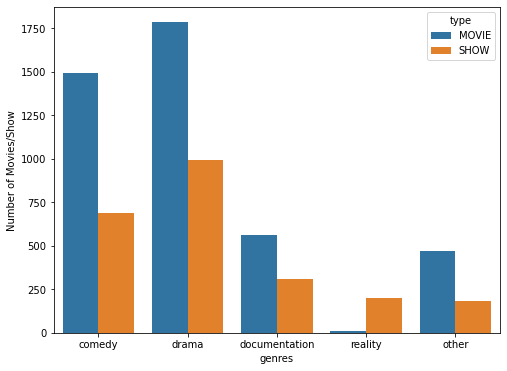

In [29]:
plt.figure(figsize = (8, 6))
p = sns.countplot(x = 'genres', data = df_gen, hue = 'type')
p.set_ylabel('Number of Movies/Show');

#### Analyzing through country

In [8]:
df['production_countries'].value_counts().reset_index().head(10)

,index,production_countries
0,['US'],1911
1,['IN'],575
2,['JP'],258
3,['GB'],214
4,['KR'],203
5,['ES'],154
6,[],134
7,['FR'],121
8,['CA'],101
9,['MX'],95


In [9]:
# make dataset of each country with count greater than 100
df_usa = df[df['production_countries'] == "['US']"]
df_ind = df[df['production_countries'] == "['IN']"]
df_jpn = df[df['production_countries'] == "['JP']"]
df_gb = df[df['production_countries'] == "['GB']"]
df_kor = df[df['production_countries'] == "['KR']"]
df_es = df[df['production_countries'] == "['ES']"]
df_fr = df[df['production_countries'] == "['FR']"]
df_ca = df[df['production_countries'] == "['CA']"]

# make dataset of countries with movies/show less than 100, then replace with other.
df_other =  df[~(df['production_countries'].isin(["['US']","['IN']","['JP']","['GB']","['KR']","['ES']","['FR']","['CA']"]))]
df_other.loc[:, 'production_countries'] = 'other'

# check weather we miss some rows or not.
print(df.shape[0] - df_usa.shape[0] - df_ind.shape[0] - df_jpn.shape[0] - df_gb.shape[0] -\
      df_kor.shape[0] - df_es.shape[0] - df_fr.shape[0] - df_ca.shape[0] == df_other.shape[0] )
print(df_other.shape)

True
(1942, 9)


In [10]:
# combine all dataset.

df_country = pd.concat([df_usa, df_ind, df_jpn, df_gb, df_kor, df_es, df_fr, df_ca, df_other], ignore_index = True)
df_country.head()

,id,title,type,description,release_year,genres,production_countries,tmdb_popularity,tmdb_score
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,"['crime', 'drama']",['US'],27.612,8.2
1,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,['horror'],['US'],95.337,7.7
2,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,"['thriller', 'crime', 'action']",['US'],14.745,7.5
3,tm185072,My Fair Lady,MOVIE,A snobbish phonetics professor agrees to a wag...,1964,"['drama', 'music', 'romance', 'family']",['US'],15.949,7.6
4,tm98978,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,"['romance', 'drama']",['US'],44.038,6.2


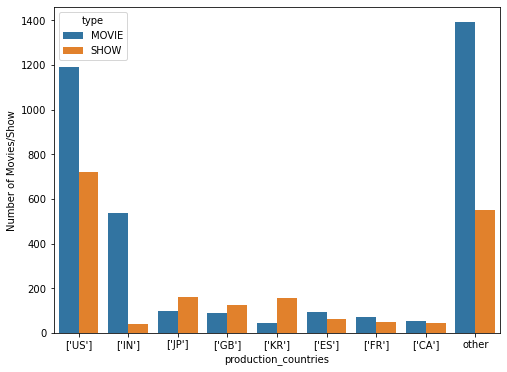

In [11]:
plt.figure(figsize = (8, 6))
sns.countplot('production_countries', data = df_country, hue = 'type')
plt.ylabel('Number of Movies/Show');

In [12]:
dfc_show = df_country[df_country['type'] == 'SHOW']
show = dfc_show.groupby(['production_countries'])['type'].count().reset_index()

dfc_movie = df_country[df_country['type'] == 'MOVIE']
movie = dfc_movie.groupby(['production_countries'])['type'].count().reset_index()

df_merge = show.merge(movie, on = 'production_countries', how = 'inner', suffixes = ('_s', '_m'))
df_merge['show_to_movie'] = df_merge['type_s']/df_merge['type_m']
df_merge.sort_values('show_to_movie')

,production_countries,type_s,type_m,show_to_movie
4,['IN'],38,537,0.070764
8,other,551,1391,0.396118
7,['US'],721,1190,0.605882
1,['ES'],61,93,0.655914
2,['FR'],51,70,0.728571
0,['CA'],46,55,0.836364
3,['GB'],124,90,1.377778
5,['JP'],160,98,1.632653
6,['KR'],158,45,3.511111


It can be seen visually and from above table,that most countries prefer movies except great britain, Japan and Korea.

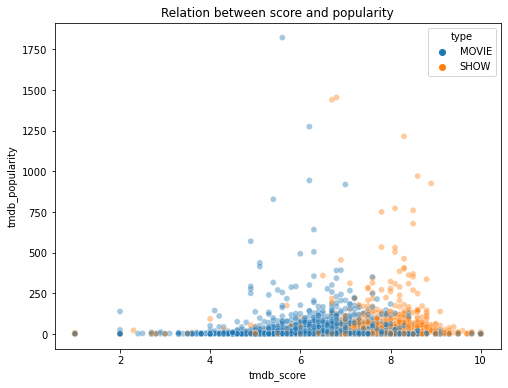

In [13]:
# relation between tmdb score and tmdb popularity of movies and show.

plt.figure(figsize = (8, 6))
sns.scatterplot('tmdb_score', 'tmdb_popularity' , data = df_country, hue = 'type', alpha = 0.4)
plt.title('Relation between score and popularity');

Above figure shows that the MOVIES have less ratings compare to SHOWS. There is not any fine relationship between tmdb score and tmdb popularity. One can't say than high ratings movies are popular.

#### WORDCLOUD

In [30]:
# lets see what kind of stories are most made according to description. And what kind of titles are given to movies.

description = (df.description)
title = df.title
stopwords = set(STOPWORDS)

In [31]:
wd_description = WordCloud(stopwords = stopwords, width = 1600, height = 1200,).generate(''.join(description))
wd_title = WordCloud(stopwords = stopwords, width = 1600, height = 1200,).generate(''.join(title))


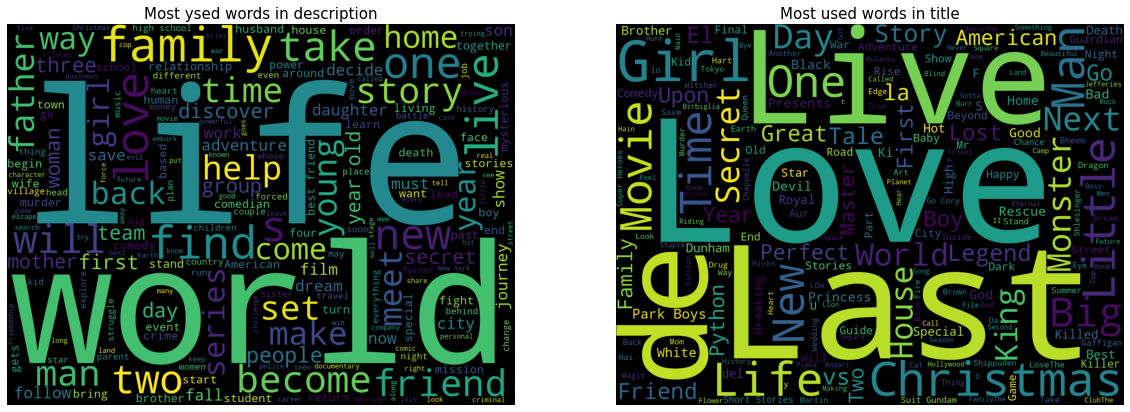

In [32]:
plt.figure(figsize = (20, 20))

plt.subplot(1,2,1)
plt.imshow(wd_description)
plt.title('Most ysed words in description', size = 15)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wd_title)
plt.title('Most used words in title', size = 15)
plt.axis('off');

#### AGE CERTIFICATION

In [34]:
df_cer = titles[['type','age_certification']]
df_cer.dropna(inplace = True)
df_cer.shape

(3196, 2)

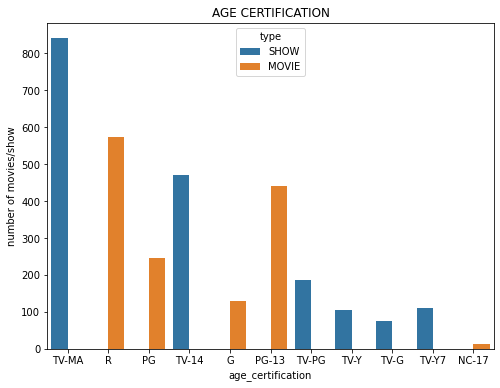

In [35]:
plt.figure(figsize = (8,6))
sns.countplot('age_certification', data = df_cer, hue = 'type')
plt.title('AGE CERTIFICATION')
plt.ylabel('number of movies/show');


* TV-MA mean TV Mature Audience Only
* PG mean Parental guidance suggested
* G is for General Audiences, anyone can watch.
* TV 14 parents may find unsuitable for children under 14 years of age
* R: Restricted, Children Under 17 Require Accompanying Parent or Adult Guardian
* PG-13 rated film is unsuitable for preteens under age 13
* TV-PG - parental guidance is recommended; these programs may be unsuitable for younger children.
* TV-Y rating means that programming is appropriate for children of all ages
* TV-G - programs suitable for all ages
* TV-Y7 indicates that programming is designed for chil- dren ages 7 and older
* NC-17 (No One Seventeen and Under Admitted) is the highest rating in Motion Picture Association film rating system assigned to films with content the MPA finds to be only suitable for ages 18 and older.